# **Graduate Rotational Internship Program (GRIP)**

**Name: Shivani Divakar Tiwari**

**Title: Prediction using Supervised ML**

**Level: Beginner**

**Batch: March-22**


# Supervised Learning : Supervised learning is when the model is getting trained on a labelled dataset. Labelled dataset is one which have both input and output parameters. In this type of learning both training and validation datasets are labelled
    

# Step 1: Data Collection

Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading dataset

In [34]:
url = "http://bit.ly/w-data"
df= pd.read_csv(url)

print('Data Imported Successfully')

Data Imported Successfully


In [35]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Step 2: Understanding the Data

In [38]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [59]:
print(df.duplicated().sum())

0


#Step 3: Checking Nulls

In [41]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [60]:
df.isnull().values.sum()

0

# Step 4: Data Visualization

**ScatterPlot**

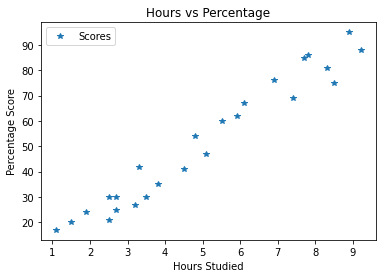

In [82]:

# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='*')    
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


To see how the data is related with each other we are using here corr()function and to represent them we are using heatmap

In [84]:
cor = data.corr()
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**HeatMap**

#Step 5: Model Building

Preparing Data

In [85]:
X= data.iloc[:, 0:1]
y= data.iloc[:,-1]

In [86]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [87]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

To test how the model’s performance,this is usually done by splitting the labelled data we have collected into two parts with 80%-20%. One part of the data is used to build the machine learning model, and is called the training data (i.e. X_train and y_train). The rest of the 20% data will be used to test how well the model works; this is called the test data(i.e. X_test, y_test).

X is having dependent variable.

Y is having independent variable 

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=3)

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Here we are using Linear Regression model to predict our data After that fitting/training the model on X_train and Y_train using .fit() method.

In [90]:
lr.fit(X_train,y_train)

LinearRegression()

**Best-Fit Line**

Text(0, 0.5, 'Scores')

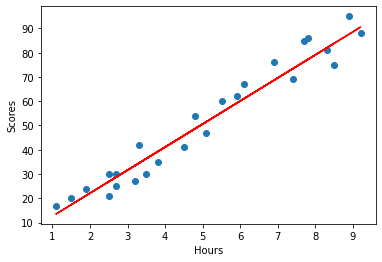

In [91]:
plt.scatter(data['Hours'],data['Scores'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel("Hours")
plt.ylabel("Scores")


Then we are predicting on X_test using .predict() method.

**Model Evaluation**

In [92]:
y_pred = lr.predict(X_test)

In [93]:
new_data = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})  
new_data 

,Original,Predicted
18,67,61.072402
17,24,21.181131
12,41,45.875727
23,76,68.670739
15,95,87.666582


In [94]:
lr.predict([[9.25]])

array([90.990855])

**Calculating Slope**

In [95]:
m = lr.coef_
m

array([9.49792159])

**Calculating Intercept**

In [96]:
b = lr.intercept_
b

3.135080283641706

In [97]:
# y = mx + b

m *9.25 + b

array([90.990855])

Checking accuracy how are model is accurate or how it is properly working on data

In [98]:
from sklearn.metrics import accuracy_score
lr.score(X_test,y_test)

0.9452617628334009

# 94% accuracy score

In [99]:
hours = np.array([[9.37]])
prediction = lr.predict(hours)
print('No of hours ={}'. format(hours))
print('Predicted score={}'.format(prediction[0]))

No of hours =[[9.37]]
Predicted score=92.13060559132774


# PREDICTED SCORE IF A STUDENT DOES NOT STUDIES FOR 9.37 HOURS PER DAY

In [100]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 34.87044660461029
Root Mean Squared Error: 5.905120371729122
Mean Absolute Error: 5.656974488548374
